In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')


In [2]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = mach_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T

    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                p=r, node_idx_to_label=idx_to_label, 
                                                w_e=5, w_l=0.8, w_m=10, max_iter=150, batch_size=64,
                                                custom_colors=custom_colors, primary="breast", show_top_trees=False)


        

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']


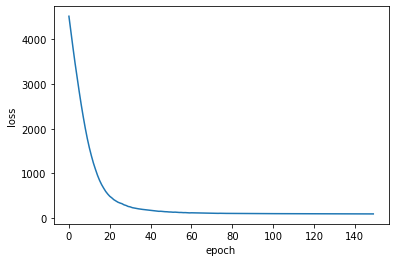

17:43:50 DEBUG

Best tree
17:43:50 DEBUG

U > 0.05

17:43:50 DEBUG
        norm     1     2     3     4     5     6     7     8     9    10
breast 0.475 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.342 0.000 0.000 0.000 0.258 0.000 0.000 0.000 0.000 0.000 0.363
kidney 0.573 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.405 0.000 0.000
liver  0.146 0.000 0.000 0.066 0.000 0.402 0.000 0.000 0.000 0.374 0.000
lung   0.306 0.000 0.000 0.000 0.000 0.000 0.000 0.597 0.000 0.000 0.000
rib    0.278 0.000 0.000 0.000 0.000 0.000 0.703 0.000 0.000 0.000 0.000
17:43:50 DEBUG

F
17:43:50 DEBUG
tensor([[0.9914, 0.5160, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.9640, 0.6217, 0.0000, 0.0000, 0.6217, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3634],
        [0.9779, 0.4051, 0.4051, 0.4051, 0.0000, 0.4051, 0.0000, 0.0000, 0.4051,
         0.0000, 0.0000],
        [0.9887, 0.8422, 0.8422, 0.8422, 0.0000, 0.7758, 0.0000, 0.0

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.902
L1: 6.0
Loss: 82.309


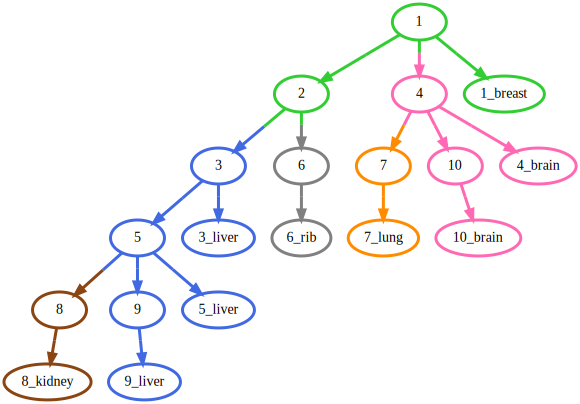

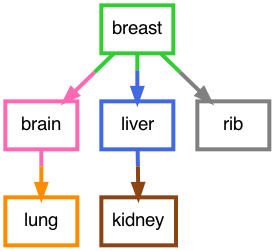

In [3]:
# Patient A7, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']


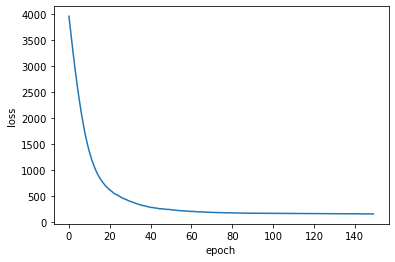

17:44:12 DEBUG

Best tree
17:44:12 DEBUG

U > 0.05

17:44:12 DEBUG
        norm     1     2     3     4     5     6     7     8     9    10
breast 0.465 0.519 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.338 0.000 0.000 0.000 0.258 0.000 0.000 0.000 0.000 0.000 0.365
kidney 0.231 0.000 0.000 0.370 0.000 0.000 0.000 0.000 0.335 0.000 0.000
liver  0.000 0.000 0.000 0.738 0.000 0.000 0.000 0.000 0.000 0.248 0.000
lung   0.302 0.000 0.000 0.000 0.000 0.000 0.000 0.600 0.000 0.000 0.000
rib    0.259 0.000 0.000 0.000 0.000 0.000 0.692 0.000 0.000 0.000 0.000
17:44:12 DEBUG

F
17:44:12 DEBUG
tensor([[0.9848, 0.5195, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.9607, 0.6230, 0.0000, 0.0000, 0.6230, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3654],
        [0.9362, 0.3700, 0.3700, 0.3700, 0.0000, 0.7053, 0.0000, 0.0000, 0.3353,
         0.0000, 0.0000],
        [0.9861, 0.7384, 0.7384, 0.7384, 0.0000, 0.9861, 0.0000, 0.0

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 15.708
L1: 6.0
Loss: 151.338


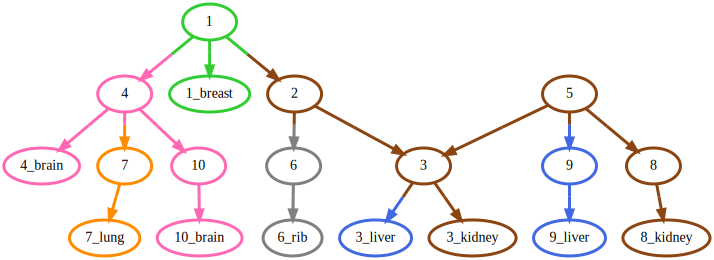

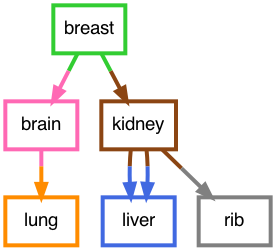

In [4]:
# Patient A7, tree 2 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


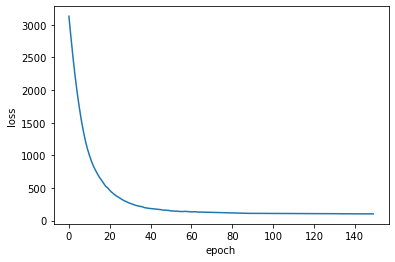

17:44:33 DEBUG

Best tree
17:44:33 DEBUG

U > 0.05

17:44:33 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.382 0.000 0.000 0.000 0.000 0.051 0.000 0.000 0.394 0.000
adrenal 0.188 0.000 0.344 0.000 0.000 0.000 0.426 0.000 0.000 0.000
liver   0.100 0.000 0.386 0.000 0.050 0.000 0.000 0.441 0.000 0.000
lung    0.589 0.080 0.000 0.000 0.000 0.266 0.000 0.000 0.000 0.000
spinal  0.556 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.369
17:44:33 DEBUG

F
17:44:33 DEBUG
tensor([[0.8273, 0.4449, 0.0000, 0.4449, 0.0000, 0.4449, 0.0000, 0.0000, 0.3941,
         0.0000],
        [0.9577, 0.7693, 0.7693, 0.0000, 0.4256, 0.0000, 0.4256, 0.0000, 0.0000,
         0.0000],
        [0.9773, 0.8777, 0.8777, 0.0000, 0.4916, 0.0000, 0.0000, 0.4412, 0.0000,
         0.0000],
        [0.9350, 0.3462, 0.0000, 0.2659, 0.0000, 0.2659, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9251, 0.3694, 0.0000, 0.3694, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3694

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.65
L1: 5.000000476837158
Loss: 88.252


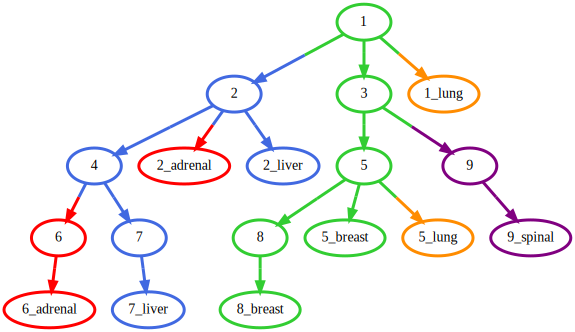

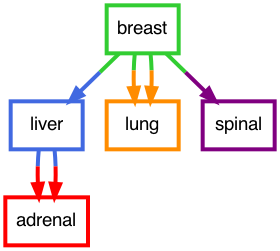

In [5]:
# Patient A1, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red', 'royalblue', 'darkorange', 'purple']]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


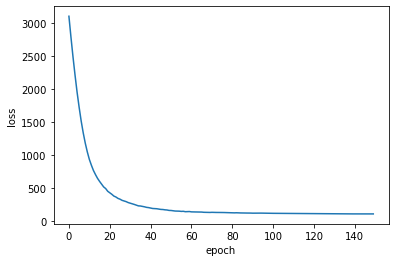

17:44:53 DEBUG

Best tree
17:44:53 DEBUG

U > 0.05

17:44:53 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.388 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.395 0.000
adrenal 0.169 0.000 0.337 0.000 0.051 0.000 0.414 0.000 0.000 0.000
liver   0.072 0.000 0.000 0.000 0.477 0.000 0.000 0.407 0.000 0.000
lung    0.523 0.148 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000
spinal  0.536 0.067 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.368
17:44:53 DEBUG

F
17:44:53 DEBUG
tensor([[0.7836, 0.3953, 0.0000, 0.3953, 0.0000, 0.3953, 0.0000, 0.0000, 0.3953,
         0.0000],
        [0.9712, 0.8019, 0.8019, 0.0000, 0.4648, 0.0000, 0.4140, 0.0000, 0.0000,
         0.0000],
        [0.9562, 0.8844, 0.8844, 0.0000, 0.4770, 0.0000, 0.0000, 0.4074, 0.0000,
         0.0000],
        [0.9325, 0.4098, 0.0000, 0.2619, 0.0000, 0.2619, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9713, 0.4352, 0.0000, 0.3677, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3677

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.786
L1: 5.0
Loss: 93.931


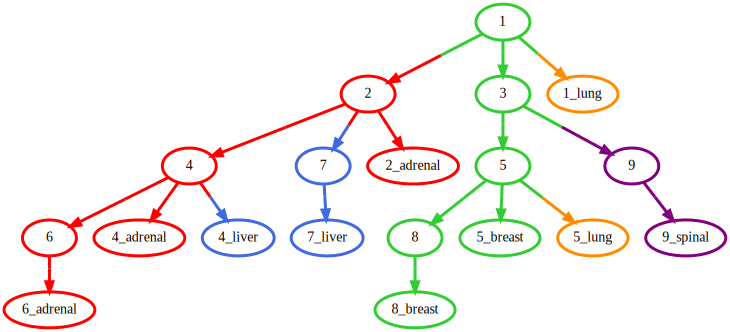

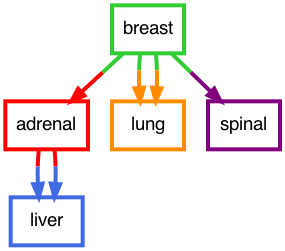

In [6]:
# Patient A1, tree 2 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red', 'royalblue', 'darkorange', 'purple']]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


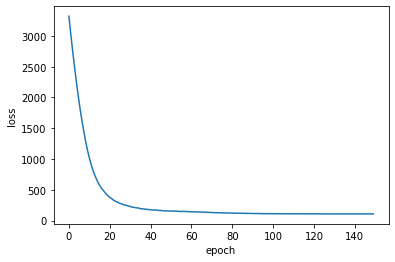

17:45:14 DEBUG

Best tree
17:45:14 DEBUG

U > 0.05

17:45:14 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.404 0.000 0.000 0.000 0.063 0.000 0.000 0.000 0.400 0.000
adrenal 0.139 0.000 0.000 0.000 0.444 0.000 0.391 0.000 0.000 0.000
liver   0.000 0.000 0.000 0.000 0.497 0.000 0.000 0.438 0.000 0.000
lung    0.590 0.081 0.000 0.000 0.000 0.270 0.000 0.000 0.000 0.000
spinal  0.562 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.373
17:45:14 DEBUG

F
17:45:14 DEBUG
tensor([[0.8667, 0.4629, 0.0626, 0.4002, 0.0626, 0.4002, 0.0000, 0.0000, 0.4002,
         0.0000],
        [0.9743, 0.8353, 0.8353, 0.0000, 0.4443, 0.0000, 0.3910, 0.0000, 0.0000,
         0.0000],
        [0.9358, 0.9358, 0.9358, 0.0000, 0.4974, 0.0000, 0.0000, 0.4384, 0.0000,
         0.0000],
        [0.9421, 0.3516, 0.0000, 0.2702, 0.0000, 0.2702, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9342, 0.3726, 0.0000, 0.3726, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3726

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 4.518
L1: 5.0
Loss: 101.592


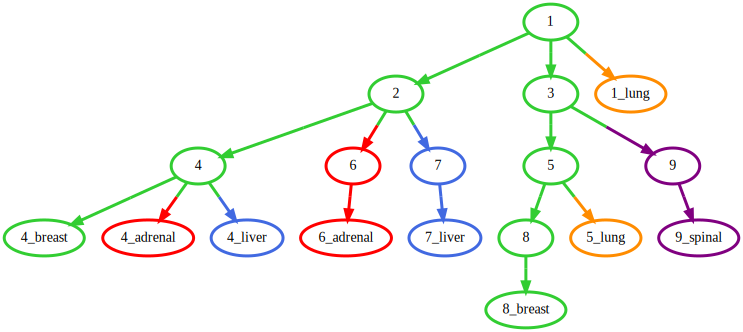

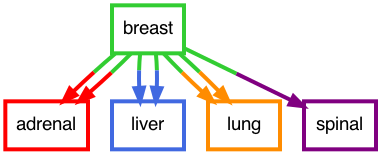

In [7]:
# Patient A1, tree 3 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red', 'royalblue', 'darkorange', 'purple']]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.3.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']


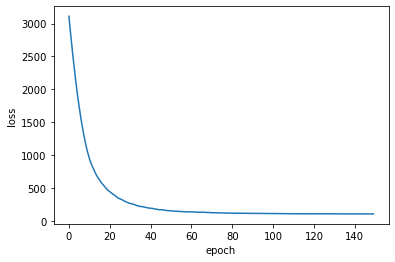

17:45:34 DEBUG

Best tree
17:45:34 DEBUG

U > 0.05

17:45:34 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.393 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.396 0.000
adrenal 0.148 0.000 0.000 0.000 0.442 0.000 0.392 0.000 0.000 0.000
liver   0.087 0.000 0.378 0.000 0.059 0.000 0.000 0.437 0.000 0.000
lung    0.595 0.075 0.000 0.000 0.000 0.269 0.000 0.000 0.000 0.000
spinal  0.552 0.054 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.370
17:45:34 DEBUG

F
17:45:34 DEBUG
tensor([[0.7891, 0.3960, 0.0000, 0.3960, 0.0000, 0.3960, 0.0000, 0.0000, 0.3960,
         0.0000],
        [0.9810, 0.8334, 0.8334, 0.0000, 0.4416, 0.0000, 0.3918, 0.0000, 0.0000,
         0.0000],
        [0.9616, 0.8748, 0.8748, 0.0000, 0.4964, 0.0000, 0.0000, 0.4374, 0.0000,
         0.0000],
        [0.9390, 0.3441, 0.0000, 0.2686, 0.0000, 0.2686, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9758, 0.4237, 0.0000, 0.3697, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3697

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.917
L1: 5.000000476837158
Loss: 89.585


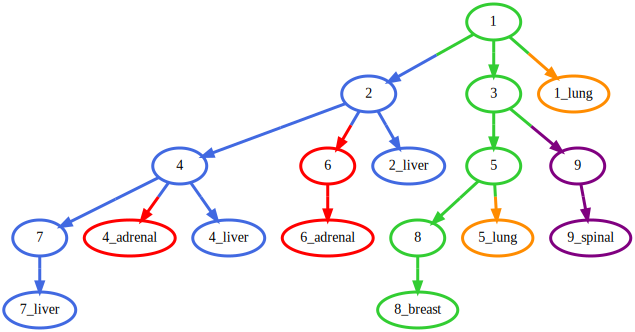

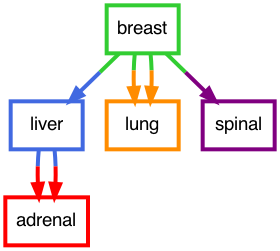

In [8]:
# Patient A1, tree 4 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red', 'royalblue', 'darkorange', 'purple']]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.4.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)
